# Financial Math with Python: Simple Rules for Growth
In this notebook, we will explore:

- **Rule of 114**: How long it takes to **triple** your money.
- **Rule of 144**: How long it takes to **quadruple** your money.
- **Rule of \(N\)**: The exact formula for growing your money by any multiple.

Let’s dive into the math and Python!
**Nothing is a financial advice!**

## Rule of 114: Tripling Your Money

The **Rule of 114** is a quick way to estimate how long it will take to **triple** your money under compound interest.

If your annual interest rate is \(r\), the time to triple is approximately:

$[
T \approx \frac{114}{r}
]$

Where:
- \(T\): Time to triple your money (in years),
- \(r\): Annual interest rate (in %).

### Exact Formula:
The exact time to triple your money can be calculated using logarithms:

$[
T = \frac{\ln(3)}{\ln(1 + \frac{r}{100})}
]$

This formula accounts for the exponential nature of compound interest, making it more accurate for all interest rates.

In [1]:
import math
from math import log

In [2]:
def exact_tripling_time(rate_percent): # rate_percent is displayed as 8 for 8%
    rate_decimal = rate_percent / 100
    return log(3) / log(1 + rate_decimal)

In [3]:
rate = 8 
exact_time = exact_tripling_time(rate)
print(f" Exact time to triple money at {rate}% interest: {exact_time:.2f} years.")

 Exact time to triple money at 8% interest: 14.27 years.


## Rule of 144: Quadrupling Your Money

The **Rule of 144** estimates how long it will take to **quadruple** your money under compound interest.

If your annual interest rate is \(r\), the time to quadruple is approximately:

$[
T \approx \frac{144}{r}
]$

### Why 144?
The Rule of 144 comes from doubling your money twice:
- To double: Use the **Rule of 72**.
- To double again: Apply the **Rule of 72** a second time.

$[
72 \times 2 = 144
]$

This is expected because:

$[
2 \times 2 = 4
]$

### Exact Formula:
The exact time to quadruple your money is:

$[
T = \frac{\ln(4)}{\ln(1 + \frac{r}{100})}
]$

This formula provides accurate results for all interest rates.


In [4]:
def exact_quadrupling_time(rate_percent):
    rate_decimal = rate_percent / 100
    return math.log(4) / math.log(1 + rate_decimal)

# Example
rate = 8  # 8% annual interest
exact_time = exact_quadrupling_time(rate)

print(f"Exact time to quadruple money at {rate}% interest: {exact_time:.2f} years")



Exact time to quadruple money at 8% interest: 18.01 years


## Rule of \(N\): Growing Money by Any Multiplier

The **exact formula** for the time to grow your money by any factor \(N\) is:

$[
T = \frac{\ln(N)}{\ln(1 + \frac{r}{100})}
]$

Where:
- \(T\): Time to grow money by a factor of \(N\) (in years),
- \(N\): Growth multiplier (e.g., \(2\) for doubling, \(3\) for tripling, \(10\) for growing 10x),
- \(r\): Annual interest rate (in %).

### Why It Works:
This formula is derived from the compound interest formula:

$[
FV = PV \cdot (1 + \frac{r}{100})^T
]$

Rearranging for \(T\) when \(FV = PV \cdot N\):

$[
N = (1 + \frac{r}{100})^T
]$

Taking the natural logarithm:

$[
\ln(N) = T \cdot \ln(1 + \frac{r}{100})
]$


Solve for \(T\):

$[
T = \frac{\ln(N)}{\ln(1 + \frac{r}{100})}
]$


In [5]:
def exact_time_for_multiplier(n, rate_percent):
    rate_decimal = rate_percent / 100
    return math.log(n) / math.log(1 + rate_decimal)

# Example: Growing your money 10x
n = 10
rate = 8  # 8% annual interest
exact_time = exact_time_for_multiplier(n, rate)

print(f"Exact time to grow money {n}x at {rate}% interest: {exact_time:.2f} years")

Exact time to grow money 10x at 8% interest: 29.92 years


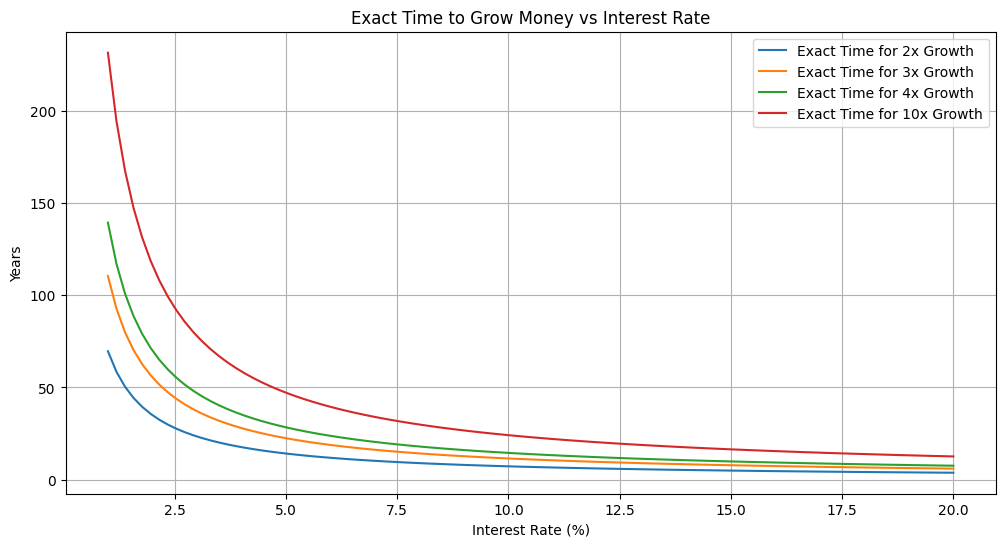

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Growth multipliers and interest rates
growth_factors = [2, 3, 4, 10]
rates = np.linspace(1, 20, 100)  # Interest rates from 1% to 20%

# Plot exact times for each multiplier
plt.figure(figsize=(12, 6))
for n in growth_factors:
    exact_times = [exact_time_for_multiplier(n, r) for r in rates]
    plt.plot(rates, exact_times, label=f"Exact Time for {n}x Growth")

plt.title("Exact Time to Grow Money vs Interest Rate")
plt.xlabel("Interest Rate (%)")
plt.ylabel("Years")
plt.legend()
plt.grid()
plt.show()


In [7]:
exact_time_for_multiplier(10, 20)

12.62925313651334

## Part 2: How Long Will Your Savings Last?

When withdrawing a fixed amount annually, your savings lifetime depends on:

1. The **annual return rate** $(r$),
2. The **annual withdrawal rate** $(w$).

### Formula:
The formula to calculate the time until savings run out is:

$[
T = \frac{\ln\left(1 + \frac{r}{w}\right)}{r}
]$

Where:
- \(T\): Time until savings run out (in years),
- \(r\): Annual return rate (as a decimal),
- \(w\): Annual withdrawal rate (as a fraction of initial savings).

### Edge Case:
If $(w \leq r)$, your savings will **never run out** because the returns fully offset withdrawals.


In [8]:
def savings_lifetime(interest_rate, withdrawal_rate):
    rate_decimal = interest_rate/100
    if withdrawal_rate <= rate_decimal:
        return float('inf')
    return log(1+rate_decimal/withdrawal_rate)/ rate_decimal

In [9]:
interest_rate = 4 #4% annual return 
withdrawal_rate = 0.05 #5% withdrawal rate
savings_lifetime(interest_rate, withdrawal_rate)

14.694666622552974

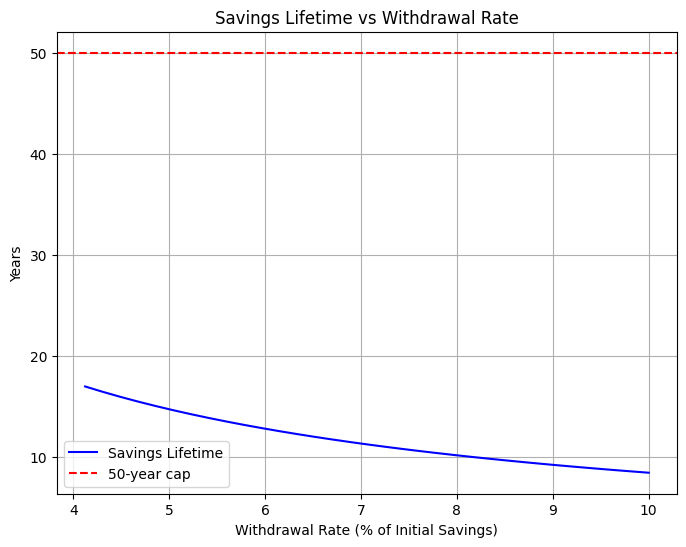

In [10]:
withdrawal_rates = np.linspace(0.01, 0.1, 50)  # Withdrawal rates from 1% to 10%
lifetimes = [savings_lifetime(4, w) for w in withdrawal_rates]

plt.figure(figsize=(8, 6))
plt.plot(withdrawal_rates * 100, lifetimes, label="Savings Lifetime", color="blue")
plt.axhline(y=50, color='red', linestyle='--', label="50-year cap")
plt.title("Savings Lifetime vs Withdrawal Rate")
plt.xlabel("Withdrawal Rate (% of Initial Savings)")
plt.ylabel("Years")
plt.legend()
plt.grid()
plt.show()